### 卷积算子应用举例

下面介绍卷积算子在图片中应用的三个案例，并观察其计算结果。

**案例1——简单的黑白边界检测**

下面是使用Conv2D算子完成一个图像边界检测的任务。图像左边为光亮部分，右边为黑暗部分，需要检测出光亮跟黑暗的分界处。

设置宽度方向的卷积核为$[1, 0, -1]$，此卷积核会将宽度方向间隔为1的两个像素点的数值相减。当卷积核在图片上滑动时，如果它所覆盖的像素点位于亮度相同的区域，则左右间隔为1的两个像素点数值的差为0。只有当卷积核覆盖的像素点有的处于光亮区域，有的处在黑暗区域时，左右间隔为1的两个点像素值的差才不为0。将此卷积核作用到图片上，输出特征图上只有对应黑白分界线的地方像素值才不为0。具体代码如下所示，结果输出在下方的图案中。

Tensor(shape=[1, 1, 50, 50], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [[[[1., 1., 1., ..., 0., 0., 0.],
          [1., 1., 1., ..., 0., 0., 0.],
          [1., 1., 1., ..., 0., 0., 0.],
          ...,
          [1., 1., 1., ..., 0., 0., 0.],
          [1., 1., 1., ..., 0., 0., 0.],
          [1., 1., 1., ..., 0., 0., 0.]]]])
[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]]


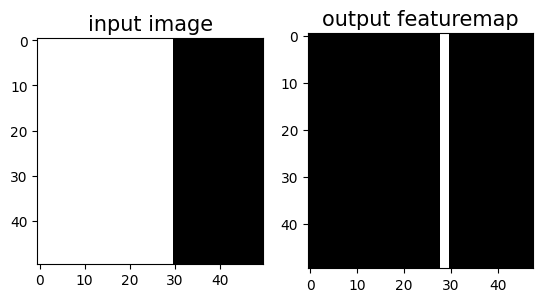

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import paddle
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign
%matplotlib inline

# 创建初始化权重参数w
w = np.array([1, 0, -1], dtype='float32')
# 将权重参数调整成纬度为[cout, cin, kh, kw]的四维张量
w = w.reshape([1, 1, 1, 3])
# 创建卷积算子，设置输出通道数，卷积核大小，和初始化权重参数
# kernel_size = [1, 3]表示kh=1, kw=3
# 创建卷积算子的时候，通过参数属性weight_attr指定参数初始化方式
# 这里的初始化方式是，从numpy.ndarray初始化卷积参数
conv = Conv2D(in_channels=1, out_channels=1, kernel_size=[1, 3],
              weight_attr=paddle.ParamAttr(initializer=Assign(value=w)))

# 创建输入图片，图片左边的像素点取值为1，右边的像素点取值为0
img = np.ones([50, 50], dtype='float32')
# print(img)
img[:, 30:] = 0.
# print(img)
# 将图片形状调整为[N, C, H, W]的形式
x = img.reshape([1, 1, 50, 50])
# print(x)
# 将numpy.ndarray转化成paddle中的tensor
x = paddle.to_tensor(x)
print(x)
# 使用卷积算子作用在输入图片上
y = conv(x)
# print(y)
# 将输出tensor转化为numpy.ndarray
out = y.numpy()
print(out)
f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img, cmap='gray')
f = plt.subplot(122)
f.set_title('output featuremap', fontsize=15)
# 卷积算子Conv2D输出的数据形状为[N, C, H, W]形式
# 此处N，C=1，输出数据形状为[1, 1, H, W]，是4维数组
# 但是画图函数plt.imshow画灰度图时，只接受2维数组
# 通过numpy.squeeze函数将大小为1的维度消除
# print(out.squeeze())
plt.imshow(out.squeeze(), cmap='gray')
plt.show()

In [15]:
# 查看卷积层的权重参数名字和数值
print(conv.weight)
# 参看卷积层的偏置参数名字和数值
print(conv.bias)

Parameter containing:
Tensor(shape=[1, 1, 1, 3], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[[[ 1.,  0., -1.]]]])
Parameter containing:
Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [0.])


绘制一个灰度图

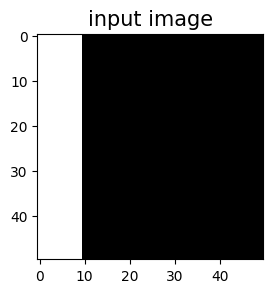

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 创建输入图片，图片左边的像素点取值为1，右边的像素点取值为0
img = np.ones([50, 50], dtype='float32')
# print(img)
img[:, 10:] = -1

f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img, cmap='gray')
plt.show()

**案例2——图像中物体边缘检测**

上面展示的是一个人为构造出来的简单图片，使用卷积网络检测图片明暗分界处的示例。对于真实的图片，也可以使用合适的卷积核(3\*3卷积核的中间值是8，周围一圈的值是8个-1)对其进行操作，用来检测物体的外形轮廓，观察输出特征图跟原图之间的对应关系，如下代码所示：

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7FD4605FF3A0>
1. x= (500, 500, 3)
1. x= [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


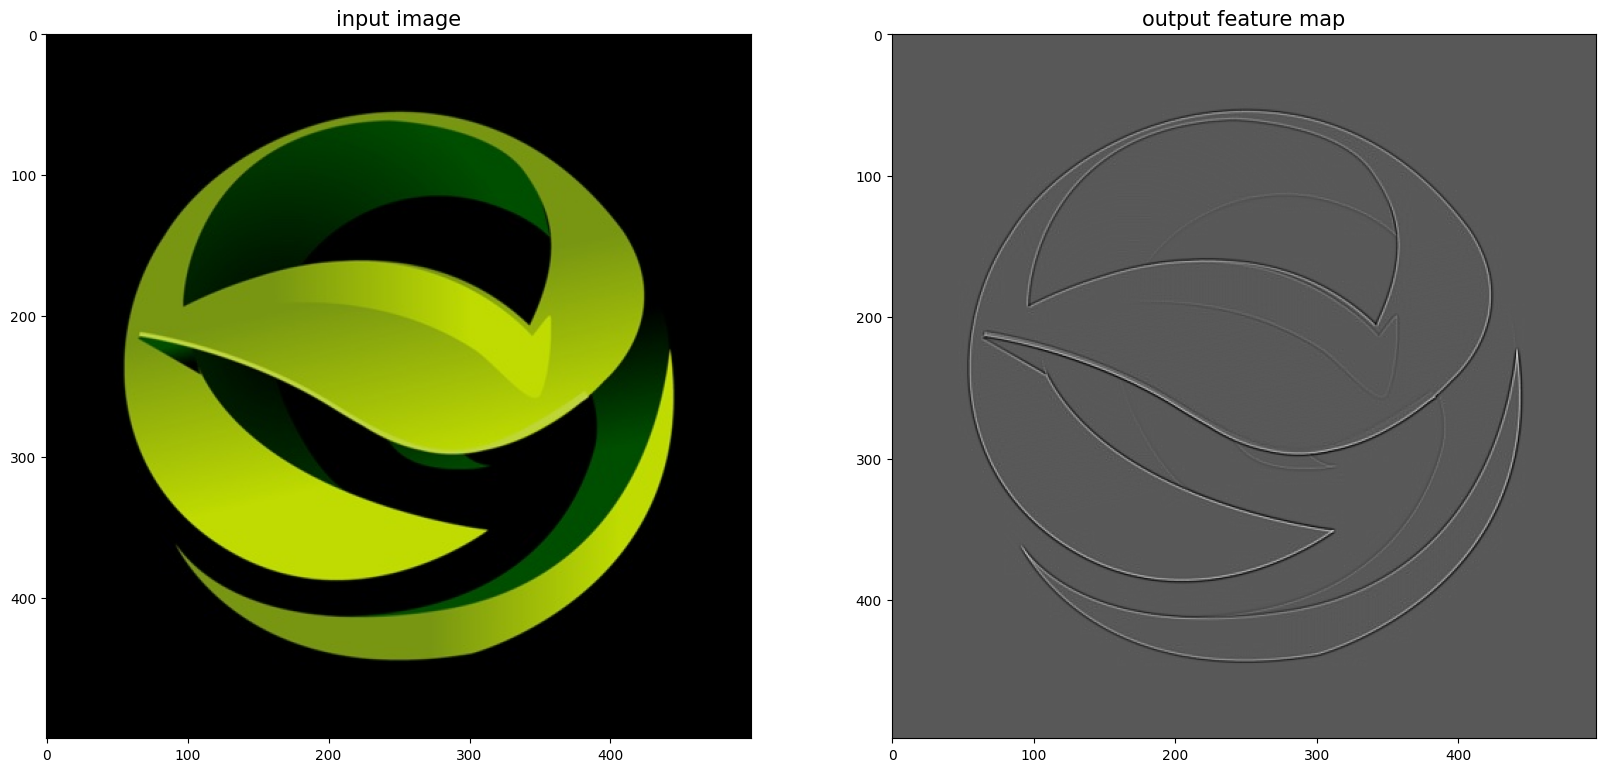

In [50]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import paddle
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign

# 注意，这里只接受jpg格式的图片。jpg包含rgb 3个通道的数值。如果是png，则包含rgba4个通道的数值
img = Image.open('./work/test2.jpg')
print(img)

# 设置卷积核参数
w = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]], dtype='float32')/8
w = w.reshape([1, 1, 3, 3])
# 由于输入通道数是3，将卷积核的形状从[1,1,3,3]调整为[1,3,3,3]
w = np.repeat(w, 3, axis=1)
# 创建卷积算子，输出通道数为1，卷积核大小为3x3，
# 并使用上面的设置好的数值作为卷积核权重的初始化参数
conv = Conv2D(in_channels=3, out_channels=1, kernel_size=[3, 3], 
            weight_attr=paddle.ParamAttr(
              initializer=Assign(value=w)))
    
# 将读入的图片转化为float32类型的numpy.ndarray
x = np.array(img).astype('float32')
print("1. x= {}".format(x.shape))
print("1. x= {}".format(x))
# 图片读入成ndarry时，形状是[H, W, 3]，
# 将通道这一维度调整到最前面
x = np.transpose(x, (2,0,1))
# 将数据形状调整为[N, C, H, W]格式
x = x.reshape(1, 3, img.height, img.width)
x = paddle.to_tensor(x)
y = conv(x)
out = y.numpy()
plt.figure(figsize=(20, 10))
f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img)
f = plt.subplot(122)
f.set_title('output feature map', fontsize=15)
plt.imshow(out.squeeze(), cmap='gray')
plt.show()

**案例3——图像均值模糊**

另外一种比较常见的卷积核（5\*5的卷积核中每个值均为1）是用当前像素跟它邻域内的像素取平均，这样可以使图像上噪声比较大的点变得更平滑，如下代码所示：

(1, 1, 5, 5)


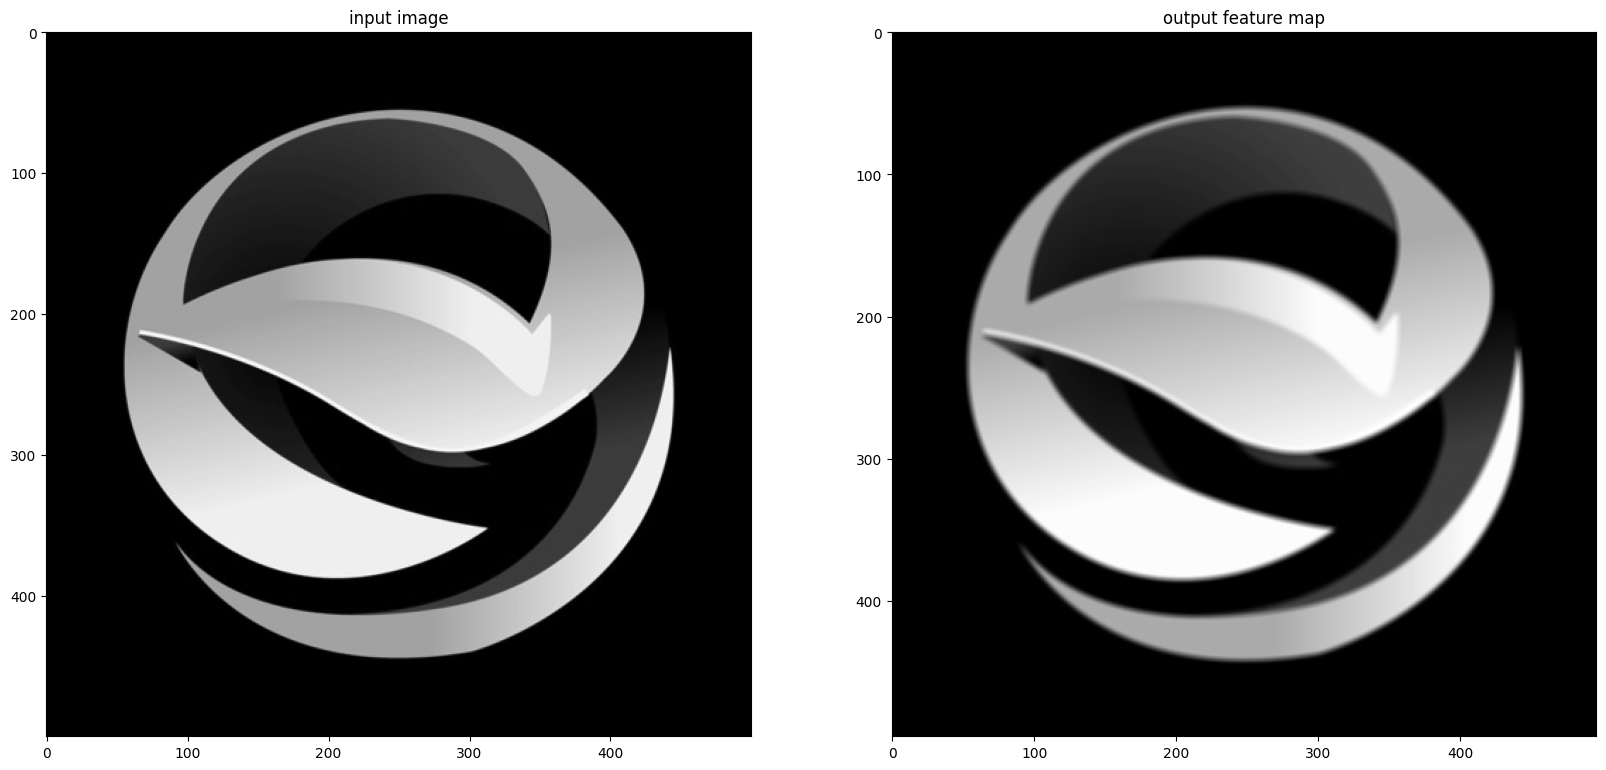

In [54]:
import paddle
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign
# 读入图片并转成numpy.ndarray
# 换成灰度图
img = Image.open('./work/test2.jpg').convert('L')
img = np.array(img)

# 创建初始化参数
w = np.ones([1, 1, 5, 5], dtype = 'float32')/25
conv = Conv2D(in_channels=1, out_channels=1, kernel_size=[5, 5], 
        weight_attr=paddle.ParamAttr(
         initializer=Assign(value=w)))
x = img.astype('float32')
x = x.reshape(1,1,img.shape[0], img.shape[1])
x = paddle.to_tensor(x)
y = conv(x)
out = y.numpy()

plt.figure(figsize=(20, 12))
f = plt.subplot(121)
f.set_title('input image')
plt.imshow(img, cmap='gray')

f = plt.subplot(122)
f.set_title('output feature map')
out = out.squeeze()
plt.imshow(out, cmap='gray')

plt.show()

## ReLU激活函数

前面介绍的网络结构中，普遍使用Sigmoid函数做激活函数。在神经网络发展的早期，Sigmoid函数用的比较多，而目前用的较多的激活函数是ReLU。这是因为Sigmoid函数在反向传播过程中，容易造成梯度的衰减。让我们仔细观察Sigmoid函数的形式，就能发现这一问题。

Sigmoid激活函数定义如下：

$$y = \frac{1}{1 + e^{-x}}$$

ReLU激活函数的定义如下：

$$y=\left\{
\begin{aligned}
0 & , & (x<0) \\
x & , & (x\ge 0)
\end{aligned}
\right.$$

下面的程序画出了Sigmoid和ReLU函数的曲线图：

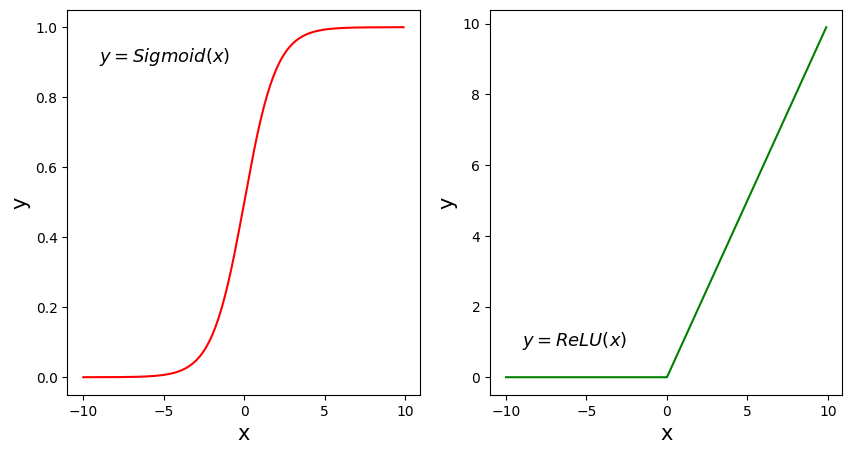

In [62]:
# ReLU和Sigmoid激活函数示意图
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.figure(figsize=(10, 5))

# 创建数据x
x = np.arange(-10, 10, 0.1)

# 计算Sigmoid函数
s = 1.0 / (1 + np.exp(0. - x))

# 计算ReLU函数
y = np.clip(x, a_min=0., a_max=None)

#######################################
# 以下部分为画图代码
f = plt.subplot(121)
plt.plot(x, s, color='r')
currentAxis=plt.gca()
plt.text(-9.0, 0.9, r'$y=Sigmoid(x)$', fontsize=13)
currentAxis.xaxis.set_label_text('x', fontsize=15)
currentAxis.yaxis.set_label_text('y', fontsize=15)

f = plt.subplot(122)
plt.plot(x, y, color='g')
currentAxis=plt.gca()
plt.text(-9.0, 0.9, r'$y=ReLU(x)$', fontsize=13)
currentAxis.xaxis.set_label_text('x', fontsize=15)
currentAxis.yaxis.set_label_text('y', fontsize=15)

plt.show()

## 批归一化（Batch Normalization）

[批归一化方法](https://arxiv.org/abs/1502.03167)（Batch Normalization，BatchNorm）是由Ioffe和Szegedy于2015年提出的，已被广泛应用在深度学习中，其目的是对神经网络中间层的输出进行标准化处理，使得中间层的输出更加稳定。

通常我们会对神经网络的数据进行标准化处理，处理后的样本数据集满足均值为0，方差为1的统计分布，这是因为当输入数据的分布比较固定时，有利于算法的稳定和收敛。对于深度神经网络来说，由于参数是不断更新的，即使输入数据已经做过标准化处理，但是对于比较靠后的那些层，其接收到的输入仍然是剧烈变化的，通常会导致数值不稳定，模型很难收敛。BatchNorm能够使神经网络中间层的输出变得更加稳定，并有如下三个优点：

- 使学习快速进行（能够使用较大的学习率）
  
- 降低模型对初始值的敏感性
  
- 从一定程度上抑制过拟合

BatchNorm主要思路是在训练时以mini-batch为单位，对神经元的数值进行归一化，使数据的分布满足均值为0，方差为1。具体计算过程如下：

**1. 计算mini-batch内样本的均值**

$$\mu_B \leftarrow \frac{1}{m}\sum_{i=1}^mx^{(i)}$$

其中$x^{(i)}$表示mini-batch中的第$i$个样本。

例如输入mini-batch包含3个样本，每个样本有2个特征，分别是：

$$x^{(1)} = (1,2), \ \ x^{(2)} = (3,6), \ \ x^{(3)} = (5,10)$$

对每个特征分别计算mini-batch内样本的均值：

$$\mu_{B0} = \frac{1+3+5}{3} = 3, \ \ \ \mu_{B1} = \frac{2+6+10}{3} = 6$$

则样本均值是:

$$\mu_{B} = (\mu_{B0}, \mu_{B1}) = (3, 6)$$

**2. 计算mini-batch内样本的方差**

$$\sigma_B^2 \leftarrow \frac{1}{m}\sum_{i=1}^m(x^{(i)} - \mu_B)^2$$

上面的计算公式先计算一个批次内样本的均值$\mu_B$和方差$\sigma_B^2$，然后再对输入数据做归一化，将其调整成均值为0，方差为1的分布。

对于上述给定的输入数据$x^{(1)}, x^{(2)}, x^{(3)}$，可以计算出每个特征对应的方差：

$$\sigma_{B0}^2 = \frac{1}{3} \cdot ((1-3)^2 + (3-3)^2 + (5-3)^2) = \frac{8}{3}$$

$$\sigma_{B1}^2 = \frac{1}{3} \cdot ((2-6)^2 + (6-6)^2 + (10-6)^2) = \frac{32}{3}$$

则样本方差是：

$$\sigma_{B}^2 = (\sigma_{B0}^2, \sigma_{B1}^2) = (\frac{8}{3}, \frac{32}{3})$$

**3. 计算标准化之后的输出**

$$\hat{x}^{(i)} \leftarrow \frac{x^{(i)} - \mu_B}{\sqrt{(\sigma_B^2 + \epsilon)}}$$

其中$\epsilon$是一个微小值（例如$1e-7$），其主要作用是为了防止分母为0。

对于上述给定的输入数据$x^{(1)}, x^{(2)}, x^{(3)}$，可以计算出标准化之后的输出：

$$\hat{x}^{(1)} = (\frac{1 - 3}{\sqrt{\frac{8}{3}}}, \ \ \frac{2 - 6}{\sqrt{\frac{32}{3}}}) = (-\sqrt{\frac{3}{2}}, \ \ -\sqrt{\frac{3}{2}})$$

$$\hat{x}^{(2)} = (\frac{3 - 3}{\sqrt{\frac{8}{3}}}, \ \ \frac{6 - 6}{\sqrt{\frac{32}{3}}}) = (0, \ \ 0) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $$

$$\hat{x}^{(3)} = (\frac{5 - 3}{\sqrt{\frac{8}{3}}}, \ \ \frac{10 - 6}{\sqrt{\frac{32}{3}}}) = (\sqrt{\frac{3}{2}}, \ \ \sqrt{\frac{3}{2}}) \ \ \ \ $$

- 读者可以自行验证由$\hat{x}^{(1)}, \hat{x}^{(2)}, \hat{x}^{(3)}$构成的mini-batch，是否满足均值为0，方差为1的分布。


如果强行限制输出层的分布是标准化的，可能会导致某些特征模式的丢失，所以在标准化之后，BatchNorm会紧接着对数据做缩放和平移。

$$y_i \leftarrow \gamma \hat{x_i} + \beta$$

其中$\gamma$和$\beta$是可学习的参数，可以赋初始值$\gamma = 1, \beta = 0$，在训练过程中不断学习调整。

上面列出的是BatchNorm方法的计算逻辑，下面针对两种类型的输入数据格式分别进行举例。飞桨支持输入数据的维度大小为2、3、4、5四种情况，这里给出的是维度大小为2和4的示例。

* **示例一：** 当输入数据形状是$[N, K]$时，一般对应全连接层的输出，示例代码如下所示。 

这种情况下会分别对K的每一个分量计算N个样本的均值和方差，数据和参数对应如下：
- 输入 x, [N, K]
- 输出 y, [N, K]
- 均值 $\mu_B$，[K, ]
- 方差 $\sigma_B^2$, [K, ]
- 缩放参数$\gamma$, [K, ]
- 平移参数$\beta$, [K, ]

In [30]:
# 输入数据形状是[N, K]时的示例
import numpy as np
import paddle
from paddle.nn import BatchNorm1D

# 创建数据
data = np.array([[1,2,3], [4,5,6], [7,8,9]]).astype('float32')
# 使用BatchNorm1D计算归一化的输出
# 输入数据维度[N, K]，num_features等于K
bn = BatchNorm1D(num_features=3)
x = paddle.to_tensor(data)
y = bn(x)
print('output of BatchNorm1D Layer: \n {}'.format(y.numpy()))

# 使用Numpy计算均值、方差和归一化的输出
# 这里对第0个特征进行验证
a = np.array([1,4,7])
a_mean = a.mean()
a_std = a.std()
b = (a - a_mean) / a_std
print('std {}, mean {}, \n output {}'.format(a_mean, a_std, b))

# 建议读者对第1和第2个特征进行验证，观察numpy计算结果与paddle计算结果是否一致
a1 = np.array([2,5,8])
a1_mean = a1.mean()
a1_std = a1.std()
b1 = (a1 - a1_mean) / a1_std
print('std {}, mean {}, \n output {}'.format(a1_mean, a1_std, b1))

# 使用Numpy计算均值、方差和归一化的输出
# 这里对第0个特征进行验证
a = np.array([3,6,9])
a_mean = a.mean()
a_std = a.std()
b = (a - a_mean) / a_std
print('std {}, mean {}, \n output {}'.format(a_mean, a_std, b))

output of BatchNorm1D Layer: 
 [[-1.2247438 -1.2247438 -1.2247438]
 [ 0.         0.         0.       ]
 [ 1.2247438  1.2247438  1.2247438]]
std 4.0, mean 2.449489742783178, 
 output [-1.22474487  0.          1.22474487]
std 5.0, mean 2.449489742783178, 
 output [-1.22474487  0.          1.22474487]
std 6.0, mean 2.449489742783178, 
 output [-1.22474487  0.          1.22474487]


* **示例二：** 当输入数据形状是$[N, C, H, W]$时， 一般对应卷积层的输出，示例代码如下所示。

这种情况下会沿着C这一维度进行展开，分别对每一个通道计算N个样本中总共$N\times H \times W$个像素点的均值和方差，数据和参数对应如下：
- 输入 x, [N, C, H, W]
- 输出 y, [N, C, H, W]
- 均值 $\mu_B$，[C, ]
- 方差 $\sigma_B^2$, [C, ]
- 缩放参数$\gamma$, [C, ]
- 平移参数$\beta$, [C, ]

------
**小窍门：**

可能有读者会问：“BatchNorm里面不是还要对标准化之后的结果做仿射变换吗，怎么使用Numpy计算的结果与BatchNorm算子一致？” 这是因为BatchNorm算子里面自动设置初始值$\gamma = 1, \beta = 0$，这时候仿射变换相当于是恒等变换。在训练过程中这两个参数会不断的学习，这时仿射变换就会起作用。

------

In [31]:
# 输入数据形状是[N, C, H, W]时的batchnorm示例
import numpy as np
import paddle
from paddle.nn import BatchNorm2D

# 设置随机数种子，这样可以保证每次运行结果一致
np.random.seed(100)
# 创建数据
data = np.random.rand(2,3,3,3).astype('float32')
# 使用BatchNorm2D计算归一化的输出
# 输入数据维度[N, C, H, W]，num_features等于C
bn = BatchNorm2D(num_features=3)
x = paddle.to_tensor(data)
y = bn(x)
print('input of BatchNorm2D Layer: \n {}'.format(x.numpy()))
print('output of BatchNorm2D Layer: \n {}'.format(y.numpy()))

# 取出data中第0通道的数据，
# 使用numpy计算均值、方差及归一化的输出
a = data[:, 0, :, :]
a_mean = a.mean()
a_std = a.std()
b = (a - a_mean) / a_std
print('channel 0 of input data: \n {}'.format(a))
print('std {}, mean {}, \n output: \n {}'.format(a_mean, a_std, b))

# 提示：这里通过numpy计算出来的输出
# 与BatchNorm2D算子的结果略有差别，
# 因为在BatchNorm2D算子为了保证数值的稳定性，
# 在分母里面加上了一个比较小的浮点数epsilon=1e-05

input of BatchNorm2D Layer: 
 [[[[0.54340494 0.2783694  0.4245176 ]
   [0.84477615 0.00471886 0.12156912]
   [0.67074907 0.82585275 0.13670659]]

  [[0.5750933  0.89132196 0.20920213]
   [0.18532822 0.10837689 0.21969749]
   [0.9786238  0.8116832  0.17194101]]

  [[0.81622475 0.27407375 0.4317042 ]
   [0.9400298  0.81764936 0.33611196]
   [0.17541045 0.37283206 0.00568851]]]


 [[[0.25242636 0.7956625  0.01525497]
   [0.5988434  0.6038045  0.10514768]
   [0.38194343 0.03647606 0.89041156]]

  [[0.98092085 0.05994199 0.89054596]
   [0.5769015  0.7424797  0.63018394]
   [0.5818422  0.02043913 0.21002658]]

  [[0.5446849  0.76911515 0.25069523]
   [0.2858957  0.8523951  0.9750065 ]
   [0.8848533  0.35950786 0.59885895]]]]
output of BatchNorm2D Layer: 
 [[[[ 0.41260773 -0.46198368  0.02029113]
   [ 1.4071033  -1.3650038  -0.9794093 ]
   [ 0.83283097  1.344658   -0.9294571 ]]

  [[ 0.25201762  1.2038352  -0.8492796 ]
   [-0.92113775 -1.1527538  -0.81768954]
   [ 1.4666054   0.9641302  -0.96

**- 预测时使用BatchNorm**

上面介绍了在训练过程中使用BatchNorm对一批样本进行归一化的方法，但如果使用同样的方法对需要预测的一批样本进行归一化，则预测结果会出现不确定性。

例如样本A、样本B作为一批样本计算均值和方差，与样本A、样本C和样本D作为一批样本计算均值和方差，得到的结果一般来说是不同的。那么样本A的预测结果就会变得不确定，这对预测过程来说是不合理的。解决方法是在训练过程中将大量样本的均值和方差保存下来，预测时直接使用保存好的值而不再重新计算。实际上，在BatchNorm的具体实现中，训练时会计算均值和方差的移动平均值。在飞桨中，默认是采用如下方式计算：

$$saved\_\mu_B \leftarrow \ saved\_\mu_B \times 0.9 + \mu_B \times (1 - 0.9)$$

$$saved\_\sigma_B^2 \leftarrow \ saved\_\sigma_B^2 \times 0.9 + \sigma_B^2 \times (1 - 0.9)$$

在训练过程的最开始将$saved\_\mu_B$和$saved\_\sigma_B^2$设置为0，每次输入一批新的样本，计算出$\mu_B$和$\sigma_B^2$，然后通过上面的公式更新$saved\_\mu_B$和$saved\_\sigma_B^2$，在训练的过程中不断的更新它们的值，并作为BatchNorm层的参数保存下来。预测的时候将会加载参数$saved\_\mu_B$和$saved\_\sigma_B^2$，用他们来代替$\mu_B$和$\sigma_B^2$。

## 丢弃法（Dropout）

丢弃法（Dropout）是深度学习中一种常用的抑制过拟合的方法，其做法是在神经网络学习过程中，随机删除一部分神经元。训练时，随机选出一部分神经元，将其输出设置为0，这些神经元将不对外传递信号。

**图16** 是Dropout示意图，左边是完整的神经网络，右边是应用了Dropout之后的网络结构。应用Dropout之后，会将标了$\times$的神经元从网络中删除，让它们不向后面的层传递信号。在学习过程中，丢弃哪些神经元是随机决定，因此模型不会过度依赖某些神经元，能一定程度上抑制过拟合。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/2afb5379d93c46c6be802a1257236b5450d3d3a4a2454b36a5ffb4e005e468ec" width = "700"></center>
<center><br>图16 Dropout示意图 </br></center>
<br></br>

在预测场景时，会向前传递所有神经元的信号，可能会引出一个新的问题：训练时由于部分神经元被随机丢弃了，输出数据的总大小会变小。比如：计算其$L1$范数会比不使用Dropout时变小，但是预测时却没有丢弃神经元，这将导致训练和预测时数据的分布不一样。为了解决这个问题，飞桨支持如下两种方法：

- **downscale_in_infer**

训练时以比例$r$随机丢弃一部分神经元，不向后传递它们的信号；预测时向后传递所有神经元的信号，但是将每个神经元上的数值乘以 $(1 - r)$。

- **upscale_in_train**

训练时以比例$r$随机丢弃一部分神经元，不向后传递它们的信号，但是将那些被保留的神经元上的数值除以 $(1 - r)$；预测时向后传递所有神经元的信号，不做任何处理。

在飞桨[Dropout API](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/nn/Dropout_cn.html)中，通过mode参数来指定用哪种方式对神经元进行操作，

> paddle.nn.Dropout(p=0.5, axis=None, mode="upscale_in_train”, name=None)

主要参数如下：

- p (float) ：将输入节点置为0的概率，即丢弃概率，默认值：0.5。该参数对元素的丢弃概率是针对于每一个元素而言，而不是对所有的元素而言。举例说，假设矩阵内有12个数字，经过概率为0.5的dropout未必一定有6个零。

- mode(str) ：丢弃法的实现方式，有'downscale_in_infer'和'upscale_in_train'两种，默认是'upscale_in_train'。

------
**说明：**

不同框架对于Dropout的默认处理方式可能不同，读者可以查看API详细了解。

------

下面这段程序展示了经过Dropout之后输出数据的形式。

In [34]:
# dropout操作
import paddle
import numpy as np

# 设置随机数种子，这样就可以保证每次运行结果一致
np.random.seed(100)
# 创建数据[N, C, H, W]，一般对应卷积层的输出
data1 = np.random.rand(2,3,3,3).astype('float32')
# 创建数据[N, K]，一般对应全连接层的输出
data2 = np.arange(1,13).reshape([-1, 3]).astype('float32')
# 使用dropout作用在输入数据上
x1 = paddle.to_tensor(data1)
# downgrade_in_infer模式下
drop11 = paddle.nn.Dropout(p = 0.5, mode = 'downscale_in_infer')
droped_train11 = drop11(x1)
# 切换到eval模式。在动态图模式下，使用eval（）切换到求值模式，该模式禁用了dropout。
drop11.eval()
droped_eval11 = drop11(x1)
# upscale_in_train模式下
drop12 = paddle.nn.Dropout(p = 0.5, mode = 'upscale_in_train')
droped_train12 = drop12(x1)
# 切换到eval模式
drop12.eval()
droped_eval12 = drop12(x1)

x2 = paddle.to_tensor(data2)
drop21 = paddle.nn.Dropout(p = 0.5, mode = 'downscale_in_infer')
droped_train21 = drop21(x2)
# 切换到eval模式
drop21.eval()
droped_eval21 = drop21(x2)
drop22 = paddle.nn.Dropout(p = 0.5, mode = 'upscale_in_train')
droped_train22 = drop22(x2)
# 切换到eval模式
drop22.eval()
droped_eval22 = drop22(x2)
    
print('x1 {}, \n droped_train11 \n {}, \n droped_eval11 \n {}'.format(data1, droped_train11.numpy(),  droped_eval11.numpy()))
print('x1 {}, \n droped_train12 \n {}, \n droped_eval12 \n {}'.format(data1, droped_train12.numpy(),  droped_eval12.numpy()))
print('x2 {}, \n droped_train21 \n {}, \n droped_eval21 \n {}'.format(data2, droped_train21.numpy(),  droped_eval21.numpy()))
print('x2 {}, \n droped_train22 \n {}, \n droped_eval22 \n {}'.format(data2, droped_train22.numpy(),  droped_eval22.numpy()))

x1 [[[[0.54340494 0.2783694  0.4245176 ]
   [0.84477615 0.00471886 0.12156912]
   [0.67074907 0.82585275 0.13670659]]

  [[0.5750933  0.89132196 0.20920213]
   [0.18532822 0.10837689 0.21969749]
   [0.9786238  0.8116832  0.17194101]]

  [[0.81622475 0.27407375 0.4317042 ]
   [0.9400298  0.81764936 0.33611196]
   [0.17541045 0.37283206 0.00568851]]]


 [[[0.25242636 0.7956625  0.01525497]
   [0.5988434  0.6038045  0.10514768]
   [0.38194343 0.03647606 0.89041156]]

  [[0.98092085 0.05994199 0.89054596]
   [0.5769015  0.7424797  0.63018394]
   [0.5818422  0.02043913 0.21002658]]

  [[0.5446849  0.76911515 0.25069523]
   [0.2858957  0.8523951  0.9750065 ]
   [0.8848533  0.35950786 0.59885895]]]], 
 droped_train11 
 [[[[0.         0.2783694  0.4245176 ]
   [0.         0.00471886 0.12156912]
   [0.         0.         0.13670659]]

  [[0.5750933  0.89132196 0.        ]
   [0.         0.         0.        ]
   [0.9786238  0.8116832  0.        ]]

  [[0.81622475 0.27407375 0.4317042 ]
   [0.  

从上述代码的输出可以发现，经过dropout之后，tensor中的某些元素变为了0，这个就是dropout实现的功能，通过随机将输入数据的元素置0，消除减弱了神经元节点间的联合适应性，增强模型的泛化能力。

# 小结

学习完这些概念，您就具备了搭建卷积神经网络的基础。下一节，我们将应用这些基础模块，一起完成图像分类中的典型应用 — 医疗图像中的眼疾筛查任务的模型搭建。

# 作业

## 1 计算卷积中一共有多少次乘法和加法操作

输入数据形状是$[10, 3, 224, 224]$，卷积核$k_h = k_w = 3$，输出通道数为$64$，步幅$stride=1$，填充$p_h = p_w = 1$。

则完成这样一个卷积，一共需要做多少次乘法和加法操作？

- 提示

先看输出一个像素点需要做多少次乘法和加法操作，然后再计算总共需要的操作次数。

- 提交方式

请回复乘法和加法操作的次数，例如：乘法1000，加法1000

## 2 计算网络层的输出数据和参数的形状

网络结构定义如下面的代码所示，输入数据形状是$[10, 3, 224, 224]$，

请分别计算每一层的输出数据形状，以及各层包含的参数形状

In [56]:
# 定义 SimpleNet 网络结构
import paddle
from paddle.nn import Conv2D, MaxPool2D, Linear
import paddle.nn.functional as F

class SimpleNet(paddle.nn.Layer):
    def __init__(self, num_classes=1):
        super(SimpleNet, self).__init__()
        self.conv1 = Conv2D(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.max_pool1 = MaxPool2D(kernel_size=2, stride=2)
        self.conv2 = Conv2D(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.max_pool2 = MaxPool2D(kernel_size=2, stride=2)
        self.fc1 = Linear(in_features=50176, out_features=64)
        self.fc2 = Linear(in_features=64, out_features=num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x.shape
        x = F.relu(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)
        x = paddle.reshape(x, [x.shape[0], -1])
        x = self.fc1(x)
        x.shape
        x = F.sigmoid(x)
        x = self.fc2(x)
        x.shape
        return x

In [60]:
# dropout操作
import paddle
import numpy as np

# 设置随机数种子，这样可以保证每次运行结果一致
np.random.seed(100)
# 创建数据[N, C, H, W]，一般对应卷积层的输出
data1 = np.random.rand(10, 3, 224, 224).astype('float32')
# 创建数据[N, K]，一般对应全连接层的输出
data2 = np.arange(1,13).astype('float32')
# 使用dropout作用在输入数据上
x1 = paddle.to_tensor(data1)
x1.shape
y1 = paddle.to_tensor(data2)

model = SimpleNet()
model.train()
model(x1)

Tensor(shape=[10, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[-1.01307440],
        [-0.96145964],
        [-0.98031986],
        [-1.02774429],
        [-1.05666900],
        [-0.98482615],
        [-0.90310717],
        [-1.08842790],
        [-0.81227279],
        [-1.07702231]])

- 提示，第一层卷积$conv1$，各项参数如下：

$$C_{in} = 3, C_{out} = 6, k_h = k_w = 5, p_h = p_w = 2, stride = 1$$

则卷积核权重参数$w$的形状是：$[C_{out}, C_{in}, k_h, k_w] = [6, 3, 5, 5]$，个数$6\times3\times5\times5 = 450$

偏置参数$b$的形状是：$[C_{out}]$，偏置参数的个数是6

输出特征图的大小是：

$$H_{out} = 224 + 2\times2 - 5 + 1 = 224, \ \ \ \ \ W_{out} = 224 + 2\times2 - 5 + 1 = 224$$

输出特征图的形状是$[N, C_{out}, H_{out}, W_{out}] = [10, 6, 224, 224]$

请将下面的表格补充完整：

| 名称 | w形状 | w参数个数 | b形状 | b参数个数 | 输出形状 |
| :------: | :------: | :-----: | :-----: | :----: | :----: |
| conv1 | [6,3,5,5] | 450  | [6] | 6 | [10, 6, 224, 224] |
| pool1 | 无 | 无  | 无 | 无 | [10, 6, 112, 112] |
| conv2 |  [16,6,5,5] | 2400   | [16]  | 16  | [10, 16, 112, 112]  |
| pool2 | 无  | 无   | 无  | 无  | [10, 16, 56, 56]  |
| fc1 |   |    |   |   |   |
| fc2 |   |    |   |   |   |

- 提交方式：将表格截图发到作业中